In [ ]:

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


sigma = 10
hw = 3*sigma
X, Y = np.meshgrid(np.arange(-hw, hw + 1, 1), np.arange(-hw, hw + 1, 1))
log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))

plt.imshow(log)


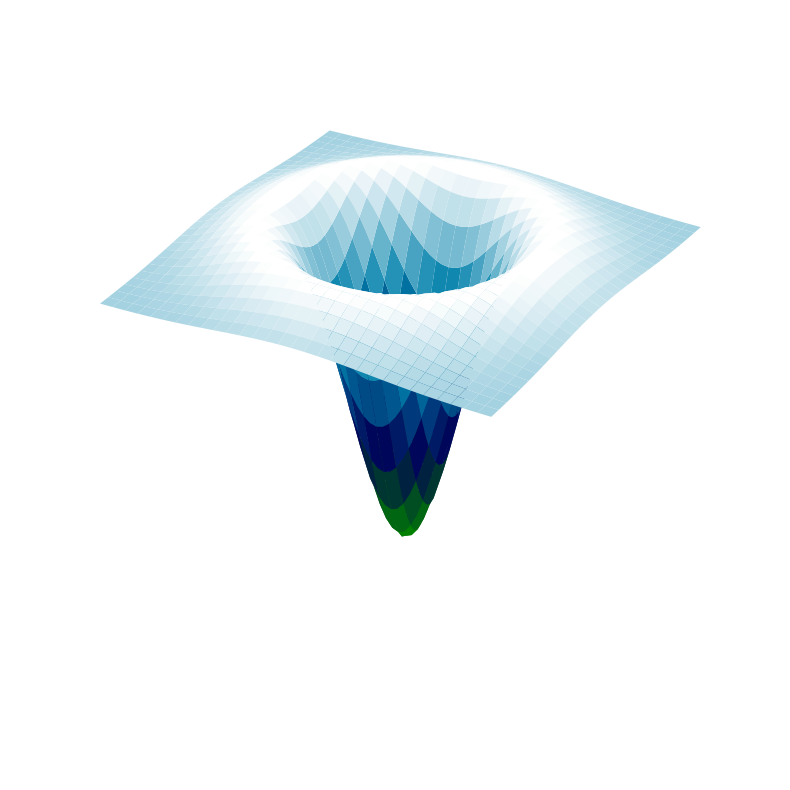

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, log, cmap=cm.ocean, linewidth = 0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.axis('off')
plt.show()

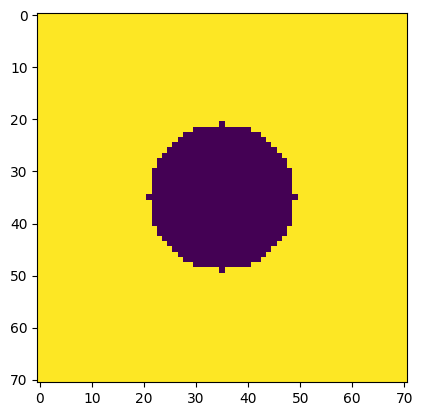

In [5]:
# Generating the circle
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

w, h = 71, 71
hw, hh = w//2, h//2
f = np.ones((h,w), dtype=np.float32)*255
X, Y = np.meshgrid(np.arange(-hh, hh + 1, 1), np.arange(-hw, hw + 1, 1))
r = w//5 # 14
f *= X**2 + Y**2 >  r**2
plt.imshow(f)

(35, 35, 5)
10


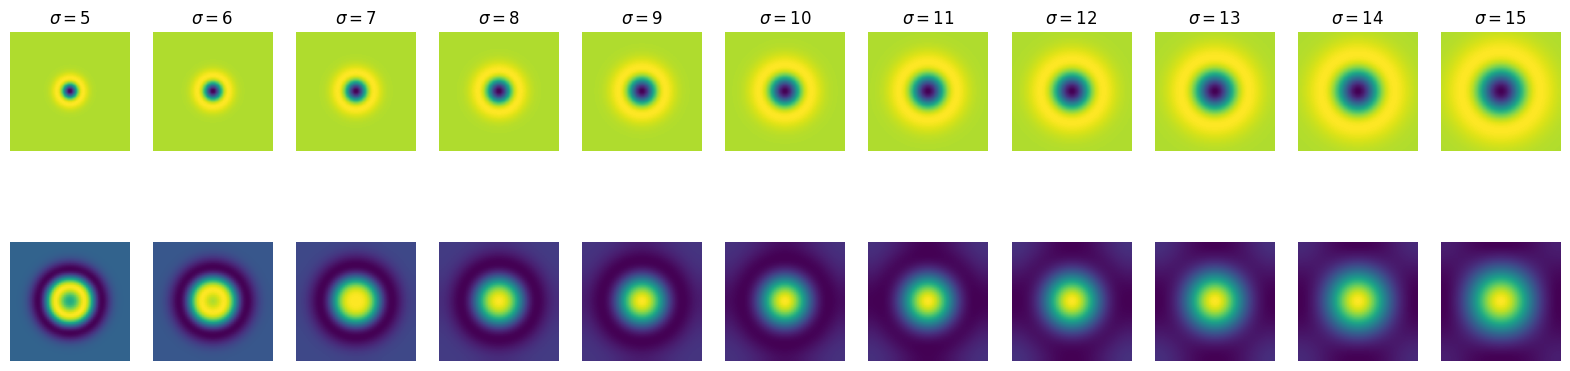

In [6]:
s = 11
fig, ax = plt.subplots(2, s, figsize=(20,5))
scale_space = np.empty((h, w, s), dtype=np.float32)
sigmas = np.arange(5, 16, 1)
for i, sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas) #size of the kernel is a constant which doesn't depend on sigma?
    X, Y = np.meshgrid(np.arange(-log_hw, log_hw + 1, 1), np.arange(-log_hw, log_hw + 1, 1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f, -1, log)
    scale_space[:, :, i] = f_log
    ax[0, i].imshow(log)
    ax[0, i].axis('off')
    ax[0, i].set_title(r'$\sigma = {}$'.format(sigma))    
    ax[1, i].imshow(f_log)
    ax[1, i].axis('off')   

indices = np.unravel_index(np.argmax(scale_space, axis=None), scale_space.shape)
print(indices) # r = \sqrt{2}*sigma 
print(sigmas[indices[2]])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

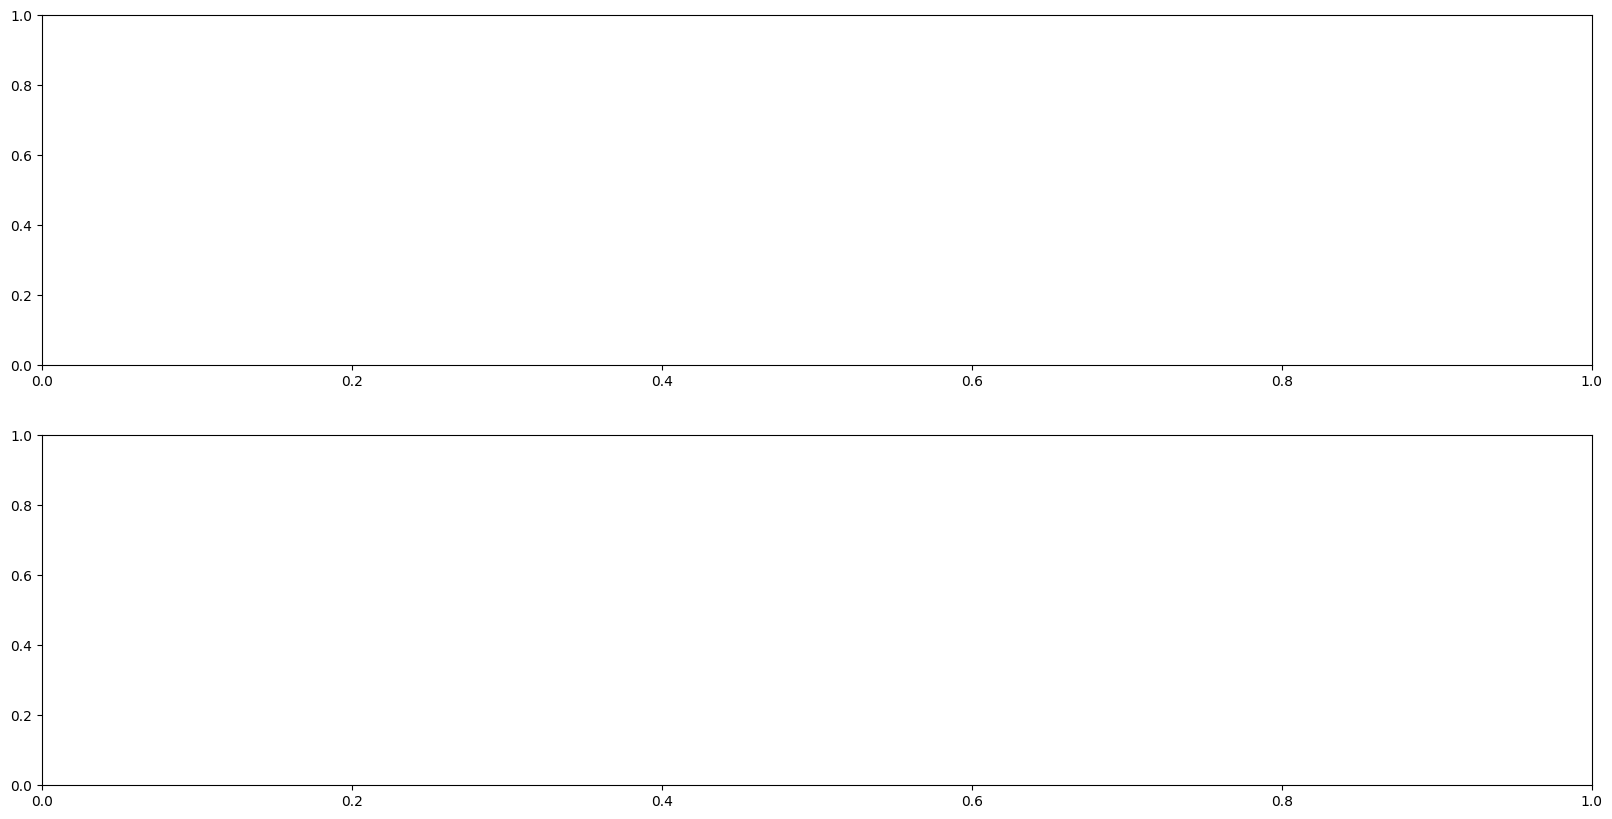

In [18]:
im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

w, h = im.shape[1], im.shape[0]
hw, hh = w//2, h//2


s = 
fig, ax = plt.subplots(2, s, figsize=(20,10))
scale_space = np.empty((h, w, s), dtype=np.float32)
sigmas = np.arange(5, 6, 1)
for i, sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas)
    X, Y = np.meshgrid(np.arange(-log_hw, log_hw + 1, 1), np.arange(-log_hw, log_hw + 1, 1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
    f_log = cv.filter2D(im, -1, log)
    scale_space[:, :, i] = f_log
    ax[0, i].imshow(log, cmap = 'gray')
    ax[0, i].axis('off')
    ax[0, i].set_title(r'$\sigma = {}$'.format(sigma))    
    ax[1, i].imshow(f_log,cmap = 'gray')
    ax[1, i].axis('off')   

indices = np.unravel_index(np.argmax(scale_space, axis=None), scale_space.shape)
print(indices) # r = \sqrt{2}*sigma 
print(sigmas[indices[2]])

Sigma: 0.01 | Value: (477.0) 
Sigma: 0.02 | Value: (477.0) 
Sigma: 0.03 | Value: (477.0) 
Sigma: 0.04 | Value: (477.0) 
Sigma: 0.05 | Value: (477.0) 
Sigma: 0.060000000000000005 | Value: (477.0) 
Sigma: 0.06999999999999999 | Value: (477.0) 
Sigma: 0.08 | Value: (477.0) 
Sigma: 0.09 | Value: (477.0) 
Sigma: 0.09999999999999999 | Value: (477.0) 


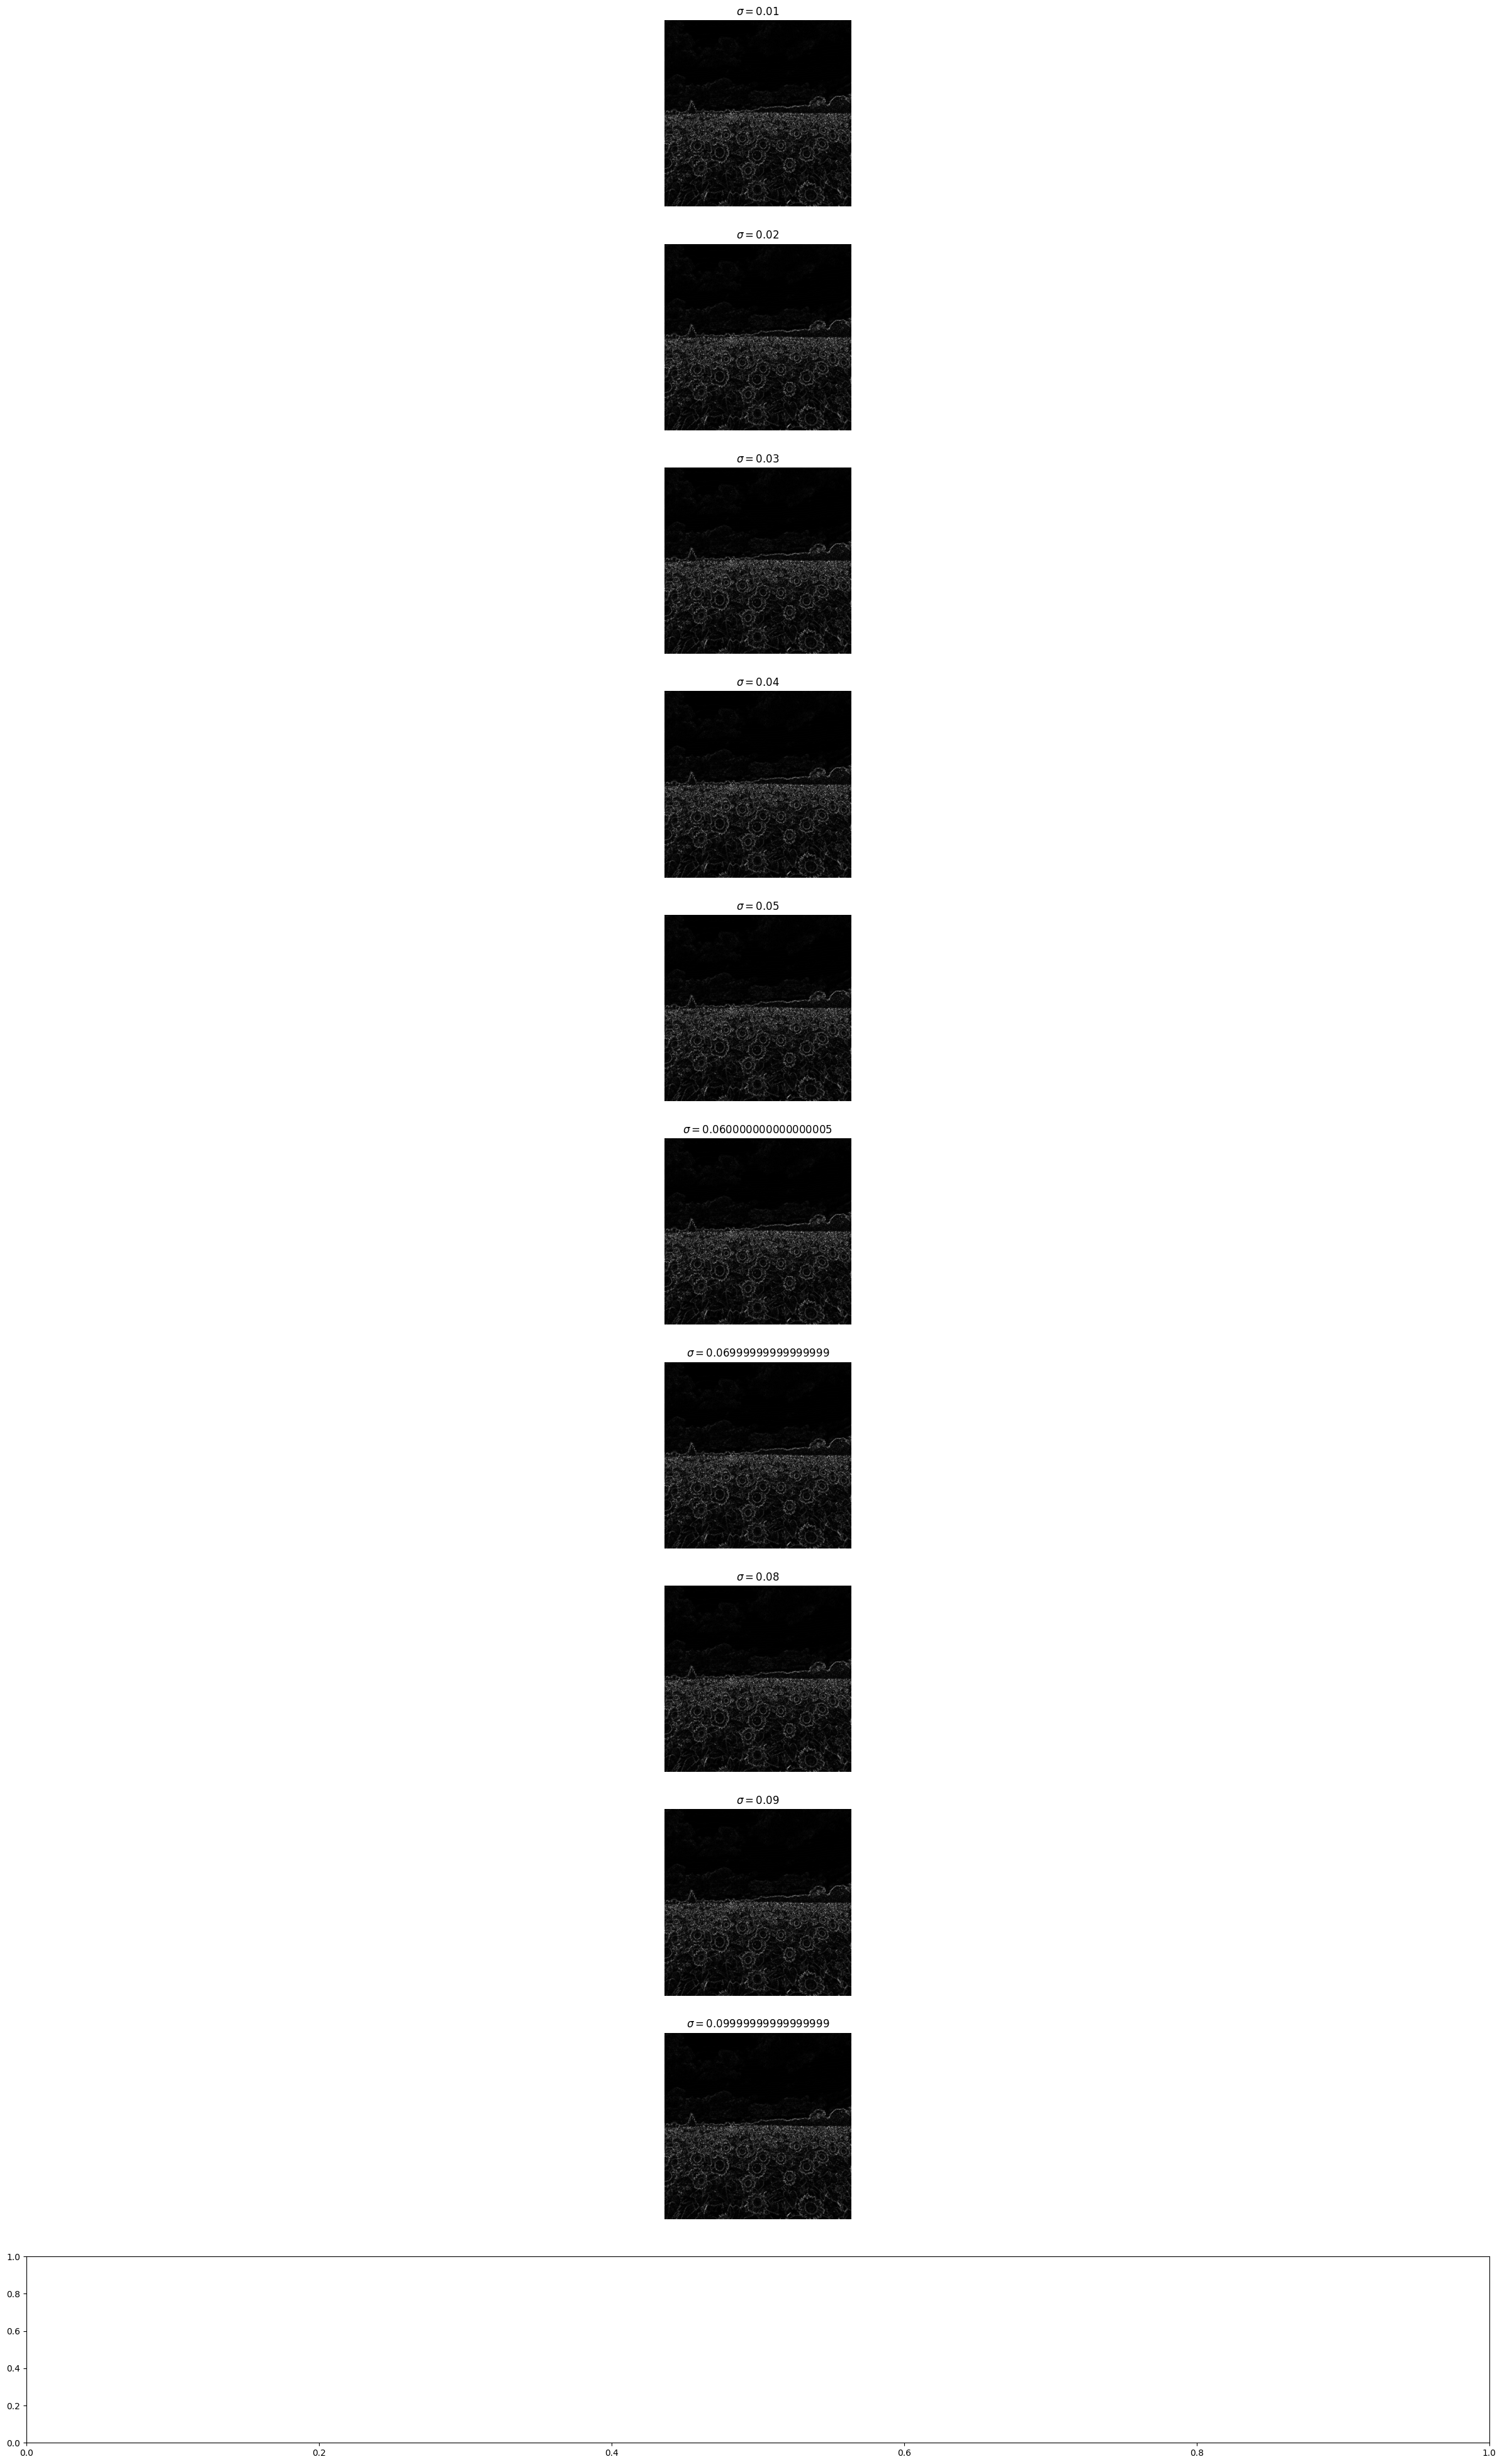

In [72]:

%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import stats

im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

w, h = im.shape[1], im.shape[0]


s = 11
max_values=np.array([])
fig, ax = plt.subplots(s, 1, figsize=(30,50))
#scale_space = np.empty((h, w, s), dtype=np.float32)
sigmas = np.arange(0.01, 0.11, 0.01)
#n = 3*np.max(sigmas)
n = 9
for i, sigma in enumerate(sigmas):
    #kernel = cv.getGaussianKernel((3*sigma,3*sigma), sigma)
    blurred_im = cv.GaussianBlur(im, (n,n), sigma)
    laplacian_im = cv.Laplacian(blurred_im, cv.CV_32F)
    abs_laplacian_im = np.abs(laplacian_im)
    #scale_space[:, :, i] = abs_laplacian_im

    

    max_values = np.append(max_values,np.max(abs_laplacian_im ))
              

    
    ax[i].axis('off')
    ax[i].set_title(r'$\sigma = {}$'.format(sigma))    
    ax[i].imshow(abs_laplacian_im,cmap = 'gray')
    ax[i].axis('off')   

#max_indices = [np.unravel_index(np.argmax(scale_space[:, :, i], axis=None), scale_space[:, :, i].shape) for i in range(scale_space.shape[2])]


for i in range(len(max_values)):
    print(f"Sigma: {sigmas[i]} | Value: ({max_values[i]}) ")



In [34]:
sigmas = np.arange(0, 1.1, 0.1)
print(sigmas)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Parameters of the largest circle:
Center: (110, 258)
Radius: 15
Sigma value: 2.0


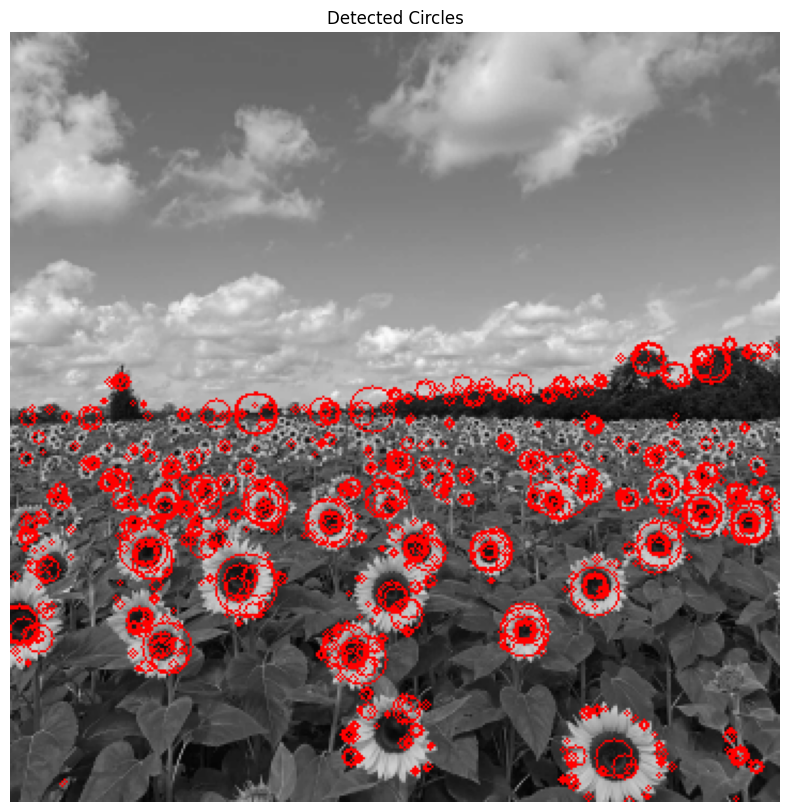

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the sunflower field image
image = cv2.imread('the_berry_farms_sunflower_field.jpeg', cv2.IMREAD_REDUCED_COLOR_4)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Set up parameters for scale-space extrema detection
min_sigma = 1.0  # Minimum sigma value (smaller values for smaller blobs)
max_sigma = 2.0  # Maximum sigma value (larger values for larger blobs)
num_sigma = 5 # Number of sigma values to test
threshold = 0.35  # Threshold for blob detection

# Create an empty list to store detected circles
circles = []

# Loop through different sigma values to detect blobs at different scales
for sigma in np.linspace(min_sigma, max_sigma, num_sigma):
    # Apply LoG (Laplacian of Gaussian) to the grayscale image with the current sigma
    blurred = cv2.GaussianBlur(gray_image, (0, 0), sigma)
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

    # Calculate the absolute Laplacian values
    abs_laplacian = np.abs(laplacian)

    # Create a binary image where blobs are detected using the threshold
    blob_mask = abs_laplacian > threshold * abs_laplacian.max()

    # Find contours in the blob mask
    contours, _ = cv2.findContours(blob_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through the detected contours and fit circles to them
    for contour in contours:
        if len(contour) >= 5:
            (x, y), radius = cv2.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)
            circles.append((center, radius, sigma))

# Sort the detected circles by radius in descending order
circles.sort(key=lambda x: -x[1])

# Report the parameters of the largest circle
largest_circle = circles[0]
center, radius, sigma = largest_circle

print("Parameters of the largest circle:")
print(f"Center: {center}")
print(f"Radius: {radius}")
print(f"Sigma value: {sigma}")

# Set the desired line thickness for drawn circles
line_thickness = 1

# Draw all detected circles with the specified line thickness
output_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
for circle in circles:
    center, radius, _ = circle
    cv2.circle(output_image, center, radius, (0, 0, 255), line_thickness)  # Red color

# Display the grayscale image with detected circles using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.axis('off')
plt.title('Detected Circles')
plt.show()

Parameters of the largest circle:
Center: (110, 258)
Radius: 15
Sigma value: 2.0


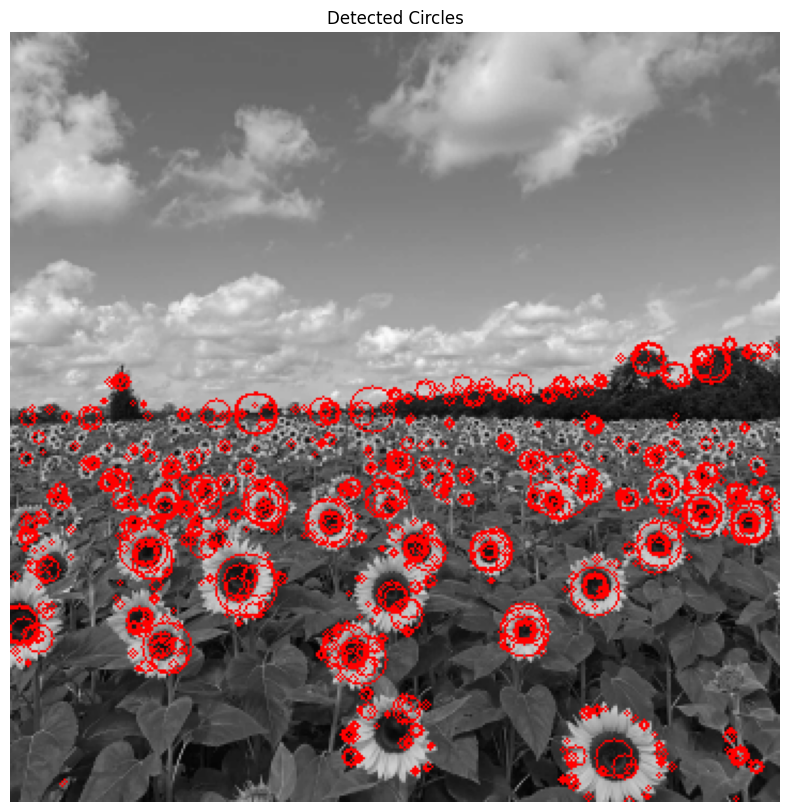

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the sunflower field image
image = cv2.imread('the_berry_farms_sunflower_field.jpeg', cv2.IMREAD_REDUCED_COLOR_4)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Set up parameters for scale-space extrema detection
min_sigma = 1.0  # Minimum sigma value (smaller values for smaller blobs)
max_sigma = 2.0  # Maximum sigma value (larger values for larger blobs)
num_sigma = 5  # Number of sigma values to test
threshold = 0.35  # Threshold for blob detection

# Create an empty list to store detected circles
circles = []

# Loop through different sigma values to detect blobs at different scales
for sigma in np.linspace(min_sigma, max_sigma, num_sigma):
    # Apply LoG (Laplacian of Gaussian) to the grayscale image with the current sigma
    blurred = cv2.GaussianBlur(gray_image, (0, 0), sigma)
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

    # Calculate the absolute Laplacian values
    abs_laplacian = np.abs(laplacian)

    # Create a binary image where blobs are detected using the threshold
    blob_mask = abs_laplacian > threshold * abs_laplacian.max()

    # Find contours in the blob mask
    contours, _ = cv2.findContours(blob_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through the detected contours and fit circles to them
    for contour in contours:
        if len(contour) >= 5:
            (x, y), radius = cv2.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)
            circles.append((center, radius, sigma))

# Sort the detected circles by radius in descending order
circles.sort(key=lambda x: -x[1])

# Report the parameters of the largest circle
largest_circle = circles[0]
center, radius, sigma = largest_circle

print("Parameters of the largest circle:")
print(f"Center: {center}")
print(f"Radius: {radius}")
print(f"Sigma value: {sigma}")

# Set the desired line thickness for drawn circles
line_thickness = 1

# Draw all detected circles with the specified line thickness
output_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
for circle in circles:
    center, radius, _ = circle
    cv2.circle(output_image, center, radius, (0, 0, 255), line_thickness)  # Red color

# Display the grayscale image with detected circles using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.axis('off')
plt.title('Detected Circles')
plt.show()


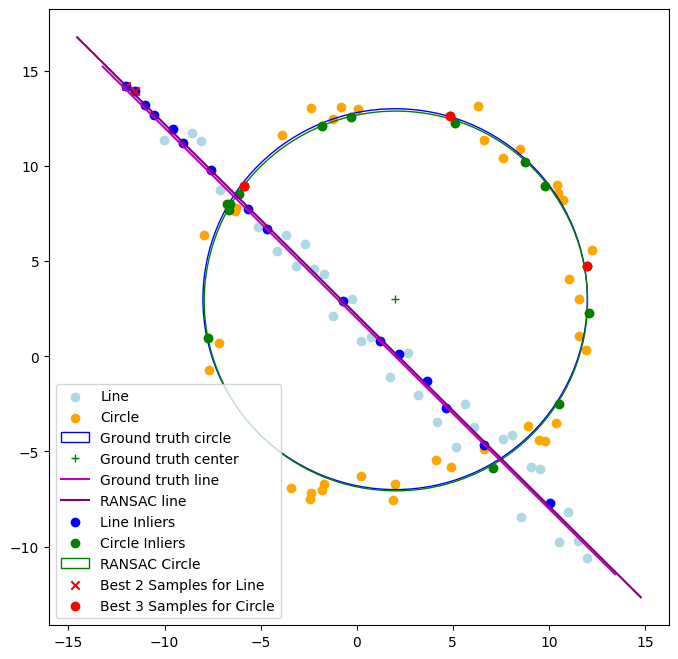

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize

import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(1)

N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center of the circle
s = r / 16

# Generate points for the circle
theta = np.random.uniform(0, 2 * np.pi, half_n)
noise = s * np.random.randn(half_n)
x_circle = x0_gt + (r + noise) * np.cos(theta)
y_circle = y0_gt + (r + noise) * np.sin(theta)

X_circ = np.column_stack((x_circle, y_circle))

# Generate points for the line
s = 1.0
m, b = -1, 2

x_line = np.linspace(-12, 12, half_n)
y_line = m * x_line + b + s * np.random.randn(half_n)

X_line = np.column_stack((x_line, y_line))
# Concatenate points from both circle and line to create X
X = np.vstack((X_circ, X_line))

# Plot the noisy points, ground truth line, and ground truth circle
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_line[:, 0], X_line[:, 1], color = 'lightblue', label='Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], color = 'orange', label='Circle')
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='blue', fill=False, label='Ground truth circle')
ax.add_artist(circle_gt)
ax.plot(x0_gt, y0_gt, '+g', label='Ground truth center')
x_min, x_max = ax.get_xlim()
x_range = np.array([x_min, x_max])
y_range = m * x_range + b
plt.plot(x_range, y_range, color='m', label='Ground truth line')



# Define a function to calculate the line equation from two points
def line_equation_from_points(x1, y1, x2, y2):
    delta_x = x2 - x1
    delta_y = y2 - y1
    magnitude = math.sqrt(delta_x**2 + delta_y**2)
    a = delta_y / magnitude
    b = -delta_x / magnitude
    d = (a * x1) + (b * y1)
    return a, b, d

# RANSAC to fit a line with unit normal constraint
def ransac_line(X, iterations, threshold, min_inliers):
    best_model = None
    best_inliers = []
    
    for _ in range(iterations):
        sample_indices = np.random.choice(len(X), 2, replace=False)
        x1, y1 = X[sample_indices[0]]
        x2, y2 = X[sample_indices[1]]
        
        a, b, d = line_equation_from_points(x1, y1, x2, y2)
        
        # Constraint: Ensure unit normal vector
        magnitude = np.sqrt(a**2 + b**2)
        a /= magnitude
        b /= magnitude
        
        # Calculate the distance of all points to the line
        distances = np.abs(a*X[:,0] + b*X[:,1] - d)
        
        # Find inliers based on the threshold
        inliers = np.where(distances < threshold)[0]
        
        if len(inliers) >= min_inliers:
            if len(inliers) > len(best_inliers):
                best_model = (a, b, d)
                best_inliers = inliers
                
    return best_model, best_inliers

# RANSAC parameters
iterations = 10000
threshold = 0.15
min_inliers = 15

# Estimate the line using RANSAC
best_line_model, Line_inlier_indices = ransac_line(X_line, iterations, threshold, min_inliers)

# Define a function to calculate the circle equation from three points
def circle_equation_from_points(x1, y1, x2, y2, x3, y3):
    # Calculate the midpoints of two line segments
    mx1, my1 = (x1 + x2) / 2, (y1 + y2) / 2
    mx2, my2 = (x2 + x3) / 2, (y2 + y3) / 2
    
    # Calculate the slopes of the two lines
    if y2 - y1 == 0:
        slope1 = 0  # Avoid division by zero
    else:
        slope1 = (x2 - x1) / (y2 - y1)
    
    if y3 - y2 == 0:
        slope2 = 0  # Avoid division by zero
    else:
        slope2 = (x3 - x2) / (y3 - y2)
    
    # Calculate the center of the circle
    x_center = (slope1 * mx1 - slope2 * mx2 + my2 - my1) / (slope1 - slope2)
    y_center = -slope1 * (x_center - mx1) + my1
    
    # Calculate the radius
    radius = np.sqrt((x1 - x_center)**2 + (y1 - y_center)**2)
    
    return x_center, y_center, radius

# RANSAC to fit a circle
def ransac_circle(X, iterations, threshold, min_inliers):
    best_model = None
    best_inliers = []
    
    for _ in range(iterations):
        sample_indices = np.random.choice(len(X), 3, replace=False)
        x1, y1 = X[sample_indices[0]]
        x2, y2 = X[sample_indices[1]]
        x3, y3 = X[sample_indices[2]]
        
        x_center, y_center, radius = circle_equation_from_points(x1, y1, x2, y2, x3, y3)
        
        # Calculate the radial error of all points to the circle
        errors = np.abs(np.sqrt((X[:, 0] - x_center)**2 + (X[:, 1] - y_center)**2) - radius)
        
        # Find inliers based on the threshold
        inliers = np.where(errors < threshold)[0]
        
        if len(inliers) >= min_inliers:
            if len(inliers) > len(best_inliers):
                best_model = (x_center, y_center, radius)
                best_inliers = inliers
                
    return best_model, best_inliers

# RANSAC parameters for circle estimation
circle_iterations = 10000
circle_threshold = 0.2  # Adjust the threshold as needed
circle_min_inliers = 15

# Identify the remnant points (not explained by the line)
remnant_indices = [i for i in range(len(X)) if i not in Line_inlier_indices]
remnant_points = X[remnant_indices]

# Estimate the circle using RANSAC
best_circle_model, circle_inlier_indices = ransac_circle(remnant_points, circle_iterations, circle_threshold, circle_min_inliers)


# Plot the results

# Plot the estimated line
x_min, x_max = ax.get_xlim()
x_range = np.array([x_min, x_max])
y_range = (-best_line_model[0] * x_range + best_line_model[2]) / best_line_model[1]
plt.plot(x_range, y_range, label='RANSAC line', color='purple')


ax.scatter(X_line[Line_inlier_indices, 0], X_line[Line_inlier_indices, 1], color='blue', label='Line Inliers')


# Find the best 2 samples for the line
best_line_sample_indices = Line_inlier_indices[:2]
best_line_samples = X_line[best_line_sample_indices]

# Plot the inliers of the circle
ax.scatter(remnant_points[circle_inlier_indices, 0], remnant_points[circle_inlier_indices, 1], color='g', label='Circle Inliers')

# Plot the estimated circle
x_center, y_center, radius = best_circle_model
circle_estimated = plt.Circle((x_center, y_center), radius, color='g', fill=False, label='RANSAC Circle')
ax.add_artist(circle_estimated)

# Find the best 3 samples for the circle (using circle_inlier_indices)
best_circle_sample_indices = circle_inlier_indices[:3]
best_circle_samples = remnant_points[best_circle_sample_indices]


# Plot the best 2 samples for the line and the best 3 samples for the circle
ax.scatter(best_line_samples[:, 0], best_line_samples[:, 1], color='red', marker='x', label='Best 2 Samples for Line')
ax.scatter(best_circle_samples[:, 0], best_circle_samples[:, 1], color='red', marker='o', label='Best 3 Samples for Circle')


plt.legend()
plt.show()




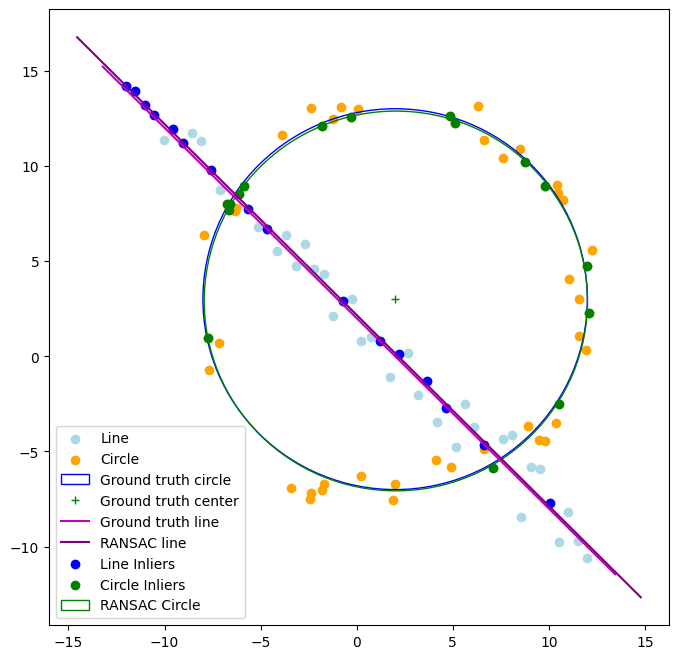

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Seed for reproducibility
np.random.seed(1)

def generate_circle_points(radius, center, num_points, noise_std):
    theta = np.random.uniform(0, 2 * np.pi, num_points)
    noise = noise_std * np.random.randn(num_points)
    x_circle = center[0] + (radius + noise) * np.cos(theta)
    y_circle = center[1] + (radius + noise) * np.sin(theta)
    return np.column_stack((x_circle, y_circle))

def generate_line_points(slope, intercept, x_range, num_points, noise_std):
    x_line = np.linspace(x_range[0], x_range[1], num_points)
    y_line = slope * x_line + intercept + noise_std * np.random.randn(num_points)
    return np.column_stack((x_line, y_line))

def plot_points_and_gt(ax, X_line, X_circ, x0_gt, y0_gt, r, m, b):
    ax.scatter(X_line[:, 0], X_line[:, 1], color='lightblue', label='Line')
    ax.scatter(X_circ[:, 0], X_circ[:, 1], color='orange', label='Circle')
    circle_gt = plt.Circle((x0_gt, y0_gt), r, color='blue', fill=False, label='Ground truth circle')
    ax.add_artist(circle_gt)
    ax.plot(x0_gt, y0_gt, '+g', label='Ground truth center')
    x_min, x_max = ax.get_xlim()
    x_range = np.array([x_min, x_max])
    y_range = m * x_range + b
    plt.plot(x_range, y_range, color='m', label='Ground truth line')

def line_equation_from_points(x1, y1, x2, y2):
    delta_x = x2 - x1
    delta_y = y2 - y1
    magnitude = math.sqrt(delta_x**2 + delta_y**2)
    a = delta_y / magnitude
    b = -delta_x / magnitude
    d = (a * x1) + (b * y1)
    return a, b, d

def ransac_line(X, iterations, threshold):
    best_model = None
    best_inliers = []

    for _ in range(iterations):
        sample_indices = np.random.choice(len(X), 2, replace=False)
        x1, y1 = X[sample_indices[0]]
        x2, y2 = X[sample_indices[1]]

        a, b, d = line_equation_from_points(x1, y1, x2, y2)

        # Constraint: Ensure unit normal vector
        magnitude = np.sqrt(a**2 + b**2)
        a /= magnitude
        b /= magnitude

        # Calculate the distance of all points to the line
        distances = np.abs(a * X[:, 0] + b * X[:, 1] - d)

        # Find inliers based on the threshold
        inliers = np.where(distances < threshold)[0]

        if len(inliers) > len(best_inliers):
            best_model = (a, b, d)
            best_inliers = inliers

    return best_model, best_inliers

def circle_equation_from_points(x1, y1, x2, y2, x3, y3):
    mx1, my1 = (x1 + x2) / 2, (y1 + y2) / 2
    mx2, my2 = (x2 + x3) / 2, (y2 + y3) / 2

    if y2 - y1 == 0:
        slope1 = 0
    else:
        slope1 = (x2 - x1) / (y2 - y1)

    if y3 - y2 == 0:
        slope2 = 0
    else:
        slope2 = (x3 - x2) / (y3 - y2)

    x_center = (slope1 * mx1 - slope2 * mx2 + my2 - my1) / (slope1 - slope2)
    y_center = -slope1 * (x_center - mx1) + my1
    radius = np.sqrt((x1 - x_center)**2 + (y1 - y_center)**2)

    return x_center, y_center, radius

def ransac_circle(X, iterations, threshold):
    best_model = None
    best_inliers = []

    for _ in range(iterations):
        sample_indices = np.random.choice(len(X), 3, replace=False)
        x1, y1 = X[sample_indices[0]]
        x2, y2 = X[sample_indices[1]]
        x3, y3 = X[sample_indices[2]]

        x_center, y_center, radius = circle_equation_from_points(x1, y1, x2, y2, x3, y3)

        errors = np.abs(np.sqrt((X[:, 0] - x_center)**2 + (X[:, 1] - y_center)**2) - radius)

        inliers = np.where(errors < threshold)[0]

        if len(inliers) > len(best_inliers):
            best_model = (x_center, y_center, radius)
            best_inliers = inliers

    return best_model, best_inliers

# Parameters
N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center of the circle
s_circle = r / 16
m_line, b_line = -1, 2
s_line = 1.0

# Generate points
X_circ = generate_circle_points(r, (x0_gt, y0_gt), half_n, s_circle)
X_line = generate_line_points(m_line, b_line, [-12, 12], half_n, s_line)
X = np.vstack((X_circ, X_line))

# Plot
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plot_points_and_gt(ax, X_line, X_circ, x0_gt, y0_gt, r, m_line, b_line)

# RANSAC parameters
iterations_line = 10000
threshold_line = 0.15
iterations_circle = 10000
threshold_circle = 0.2

# RANSAC for line
best_line_model, line_inlier_indices = ransac_line(X_line, iterations_line, threshold_line)

# RANSAC for circle
remnant_indices = [i for i in range(len(X)) if i not in line_inlier_indices]
remnant_points = X[remnant_indices]
best_circle_model, circle_inlier_indices = ransac_circle(remnant_points, iterations_circle, threshold_circle)

# Plot results
x_min, x_max = ax.get_xlim()
x_range = np.array([x_min, x_max])
y_range_line = (-best_line_model[0] * x_range + best_line_model[2]) / best_line_model[1]
ax.plot(x_range, y_range_line, label='RANSAC line', color='purple')
ax.scatter(X_line[line_inlier_indices, 0], X_line[line_inlier_indices, 1], color='blue', label='Line Inliers')

ax.scatter(remnant_points[circle_inlier_indices, 0], remnant_points[circle_inlier_indices, 1], color='g', label='Circle Inliers')

x_center_circle, y_center_circle, radius_circle = best_circle_model
circle_estimated = plt.Circle((x_center_circle, y_center_circle), radius_circle, color='g', fill=False, label='RANSAC Circle')
ax.add_artist(circle_estimated)

plt.legend()
plt.show()
